# Modeling

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import wrangle as wr
import split_scale as ss
import evaluate as ev

## Lets load in the data on student grades

In [2]:
grades = pd.read_csv('exam_scores.csv')
grades = grades.set_index('student_id')
grades.replace(r'^\s*$', np.nan, regex=True, inplace=True)
grades = grades.dropna().astype('int')
grades

,exam1,exam2,exam3,final_grade
student_id,,,,
1,100,90,95,96
2,98,93,96,95
3,85,83,87,87
4,83,80,86,85
5,93,90,96,97
...,...,...,...,...
100,70,65,78,77
101,62,70,79,70
102,58,65,70,68


### Next, lets split the data into train and test datasets.

In [3]:
train, test = ss.single_split_my_data(grades, 0.7, 13)
train

,exam1,exam2,exam3,final_grade
student_id,,,,
101,62,70,79,70
82,83,80,86,85
44,93,90,96,97
47,73,70,75,76
16,85,83,87,87
...,...,...,...,...
28,98,93,96,95
19,79,70,85,81
77,57,65,75,65


### Now we will create a model that uses exam 1 to predict the final grade.

In [4]:
X_train = train[['exam1']]
y_train = train[['final_grade']]

lm = LinearRegression()

lm.fit(X_train, y_train)

predictions = train[['final_grade']]

predictions['lm_exam1'] = lm.predict(X_train)
predictions

,final_grade,lm_exam1
student_id,,
101,70,69.271490
82,85,84.936556
44,97,92.396111
47,76,77.477000
16,87,86.428467
...,...,...
28,95,96.125889
19,81,81.952734
77,65,65.541712


### Lets also make a model that uses exam 2 to predict the final grade.

In [5]:
X_train = train[['exam2']]

lm.fit(X_train, y_train)

predictions['lm_exam2'] = lm.predict(X_train)
predictions

,final_grade,lm_exam1,lm_exam2
student_id,,,
101,70,69.271490,74.693336
82,85,84.936556,84.303873
44,97,92.396111,93.914410
47,76,77.477000,74.693336
16,87,86.428467,87.187034
...,...,...,...
28,95,96.125889,96.797571
19,81,81.952734,74.693336
77,65,65.541712,69.888068


### Now lets compare these two models

#### First lets compare their mean_squared errors

In [6]:
print("Mean Squared Error: ")
predictions.apply(lambda col: mean_squared_error(predictions.final_grade, col))

Mean Squared Error: 


final_grade     0.000000
lm_exam1        3.533659
lm_exam2       18.735157
dtype: float64

So we can see that exam1 is doing better

#### Next lets plot out the residuals

Text(0.5, 0.98, 'How well does exam 1 predict?')

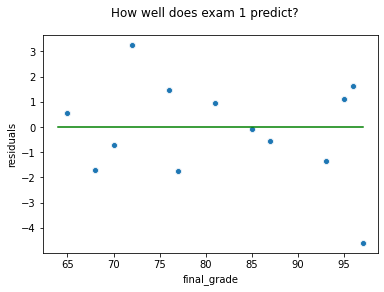

In [7]:
ev.rplot_residuals('final_grade', 'lm_exam1', predictions)
plt.suptitle("How well does exam 1 predict?")

Text(0.5, 0.98, 'How well does exam 2 predict?')

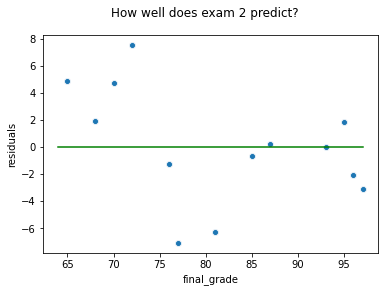

In [8]:
ev.rplot_residuals('final_grade', 'lm_exam2', predictions)
plt.suptitle("How well does exam 2 predict?")

#### Next lets plot the actual vs the predicted values

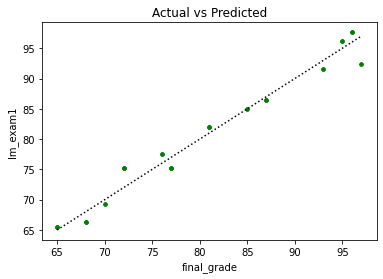

In [9]:
ev.plot_actual_vs_predicted('final_grade', 'lm_exam1', predictions)

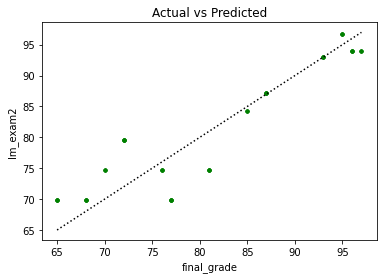

In [10]:
ev.plot_actual_vs_predicted('final_grade', 'lm_exam2', predictions)

### Next lets create a model that uses exam 1 and exam 3

In [11]:
X_train = train[['exam1', 'exam3']]

lm.fit(X_train, y_train)

predictions['lm_exam1_and_exam3'] = lm.predict(X_train)
predictions

,final_grade,lm_exam1,lm_exam2,lm_exam1_and_exam3
student_id,,,,
101,70,69.271490,74.693336,70.434619
82,85,84.936556,84.303873,84.784073
44,97,92.396111,93.914410,93.314953
47,76,77.477000,74.693336,75.998523
16,87,86.428467,87.187034,86.235578
...,...,...,...,...
28,95,96.125889,96.797571,96.307038
19,81,81.952734,74.693336,82.135734
77,65,65.541712,69.888068,66.423851


In [12]:
print("Mean Squared Error: ")
predictions.apply(lambda col: mean_squared_error(predictions.final_grade, col))

Mean Squared Error: 


final_grade            0.000000
lm_exam1               3.533659
lm_exam2              18.735157
lm_exam1_and_exam3     3.108150
dtype: float64

Now we can see that the model using both exam1 and exam3 is working the best

## Now lets see how this model does on the test data

In [13]:
X_train = train[['exam1', 'exam3']]
y_train = train[['final_grade']]

X_test = test[['exam1', 'exam3']]
y_test = test[['final_grade']]

lm = LinearRegression()

lm.fit(X_train, y_train)

y_test['test_predictions'] = lm.predict(X_test)
y_test

,final_grade,test_predictions
student_id,,
60,76,75.998523
42,87,86.235578
74,77,74.967284
17,85,84.784073
46,93,92.207194
36,70,70.434619
32,81,82.135734
11,68,65.748913
70,97,93.314953


In [14]:
print("Mean Squared Error: ")
y_test.apply(lambda col: mean_squared_error(y_test.final_grade, col))

Mean Squared Error: 


final_grade         0.000000
test_predictions    3.033886
dtype: float64

# Telco Data

## Now lets use the telco data

In [15]:
telco = wr.wrangle_telco()
telco

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40
1691,9972-EWRJS,19.25,67,1372.90
1692,9975-GPKZU,19.75,46,856.50
1693,9993-LHIEB,67.85,67,4627.65


In [16]:
train, test = ss.single_split_my_data(telco, .8, 13)
train

,customer_id,monthly_charges,tenure,total_charges
1133,6741-QRLUP,80.30,63,4995.35
687,4129-LYCOI,104.00,67,7039.05
448,2725-TTRIQ,84.20,72,5986.55
282,1741-WTPON,115.85,56,6567.90
869,5271-YNWVR,113.15,68,7856.00
...,...,...,...,...
750,4656-CAURT,23.95,69,1713.10
1562,9225-BZLNZ,85.25,72,6083.10
74,0455-ENTCR,85.25,66,5538.35
176,1063-DHQJF,92.15,69,6480.90


In [17]:
X_train = train[['tenure']]
y_train = train[['total_charges']]

y_train['baseline'] = y_train.total_charges.mean()

lm = LinearRegression()

lm.fit(X_train, y_train.total_charges)

y_train['lm_tenure'] = lm.predict(X_train)
y_train

,total_charges,baseline,lm_tenure
1133,4995.35,3720.995772,4247.784648
687,7039.05,3720.995772,4612.927419
448,5986.55,3720.995772,5069.355884
282,6567.90,3720.995772,3608.784797
869,7856.00,3720.995772,4704.213112
...,...,...,...
750,1713.10,3720.995772,4795.498805
1562,6083.10,3720.995772,5069.355884
74,5538.35,3720.995772,4521.641727
176,6480.90,3720.995772,4795.498805


In [18]:
X_train = train[['monthly_charges']]

lm.fit(X_train, y_train.total_charges)

y_train['lm_monthly'] = lm.predict(X_train)
y_train

,total_charges,baseline,lm_tenure,lm_monthly
1133,4995.35,3720.995772,4247.784648,5105.694582
687,7039.05,3720.995772,4612.927419,6767.501689
448,5986.55,3720.995772,5069.355884,5379.156511
282,6567.90,3720.995772,3608.784797,7598.405243
869,7856.00,3720.995772,4704.213112,7409.085446
...,...,...,...,...
750,1713.10,3720.995772,4795.498805,1154.520301
1562,6083.10,3720.995772,5069.355884,5452.780877
74,5538.35,3720.995772,4521.641727,5452.780877
176,6480.90,3720.995772,4795.498805,5936.598136


In [19]:
X_train = train[['tenure', 'monthly_charges']]

lm.fit(X_train, y_train.total_charges)

y_train['lm_tenure_and_monthly'] = lm.predict(X_train)
y_train

,total_charges,baseline,lm_tenure,lm_monthly,lm_tenure_and_monthly
1133,4995.35,3720.995772,4247.784648,5105.694582,5170.325728
687,7039.05,3720.995772,4612.927419,6767.501689,6790.450301
448,5986.55,3720.995772,5069.355884,5379.156511,5776.936776
282,6567.90,3720.995772,3608.784797,7598.405243,7070.636269
869,7856.00,3720.995772,4704.213112,7409.085446,7393.755764
...,...,...,...,...,...
750,1713.10,3720.995772,4795.498805,1154.520301,1950.462953
1562,6083.10,3720.995772,5069.355884,5452.780877,5841.491206
74,5538.35,3720.995772,4521.641727,5452.780877,5596.932906
176,6480.90,3720.995772,4795.498805,5936.598136,6143.426881


In [20]:
print("Root Mean Squared Error: ")
y_train.apply(lambda col: math.sqrt(mean_squared_error(y_train.total_charges, col)))

Root Mean Squared Error: 


total_charges               0.000000
baseline                 2567.588233
lm_tenure                2000.177727
lm_monthly                813.948102
lm_tenure_and_monthly     485.575374
dtype: float64

In [21]:
X_train = train[['tenure', 'monthly_charges']]
y_train = train[['total_charges']]

X_test = test[['tenure', 'monthly_charges']]
y_test = test[['total_charges']]

lm = LinearRegression()

lm.fit(X_train, y_train)

y_test['lm_tenure_and_monthly'] = lm.predict(X_test)
y_test

,total_charges,lm_tenure_and_monthly
1624,1620.20,1998.849830
811,3983.60,4000.152941
1503,987.95,804.521963
809,1402.25,1432.882717
867,1024.70,820.689516
...,...,...
615,6067.40,6329.913116
762,4634.35,5629.370771
529,264.55,-612.614499
569,4868.40,4946.038015


In [22]:
print('RMSE on test data: ')
math.sqrt(mean_squared_error(y_test.total_charges, y_test.lm_tenure_and_monthly))

RMSE on test data: 


532.2083715969611